## Exploration of the dataset

Let's start with a quick exploration of the dataset.

This code imports the required libraries, including NumPy, Pandas, and Matplotlib. It also imports the JSON library.






In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import json

This code read data from csv file and print first 10 rows of dataframe

In [11]:
dfi = pd.read_csv('data.csv')

dfi.head(10)

,letter_key,author,year,month,day,place,language,source
0,hl_01,NaN,NaN,NaN,NaN,Magnac-Laval,french,https://centenaire1418hautlimousin.jimdo.com
1,hl_02,Jeanne Fillaud,1914.0,12.0,31.0,Montmorillon,french,https://centenaire1418hautlimousin.jimdo.com
2,hl_03a,J.Delabracherie,1914.0,NaN,NaN,Magnac-Laval,french,https://centenaire1418hautlimousin.jimdo.com
3,hl_03b,J.Delabracherie,1914.0,NaN,NaN,Magnac-Laval,french,https://centenaire1418hautlimousin.jimdo.com
4,hl_04,G.Ragain,1916.0,5.0,27.0,NaN,french,https://centenaire1418hautlimousin.jimdo.com
5,hl_05,NaN,1914.0,10.0,8.0,Limousin,french,https://centenaire1418hautlimousin.jimdo.com
6,hl_06,Chapelain,1914.0,11.0,1.0,Ypres,french,https://centenaire1418hautlimousin.jimdo.com
7,hl_07,Chazette,1914.0,9.0,17.0,Croissy-Beaubourg,french,https://centenaire1418hautlimousin.jimdo.com
8,hl_08,NaN,1916.0,4.0,16.0,NaN,french,https://centenaire1418hautlimousin.jimdo.com
9,hl_09,NaN,1916.0,5.0,28.0,NaN,french,https://centenaire1418hautlimousin.jimdo.com


Let's look if there are missing values.

print the number of rows 

In [12]:
print(len(dfi))

60


This code count number of missing value in each columns

In [13]:
dfi.isna().sum()

letter_key     0
author        10
year           5
month          7
day            8
place          8
language       0
source         0
dtype: int64

For 60 letters, we have:

_ 10 unknown authors

_ 8 unkown places

About the date of writing, year is missing 5 times, month 7 times, and day 8 times.
ID, language and source are all OK.

This code prints the unique values in the 'language', 'year', and 'source' columns of a Pandas DataFrame called 'dfi'. The 'set' function is used to obtain a unique list of values in each column.






In [14]:
print(set(dfi['language']))
print(set(dfi['year']))
print(set(dfi['source']))

{'french', 'english'}
{nan, nan, nan, nan, nan, 1914.0, 1915.0, 1916.0, 1917.0, 1918.0}
{'https://www.nationalarchives.gov.uk', 'https://centenaire1418hautlimousin.jimdo.com', 'http://www.archives71.fr'}


In the dataset, there are letters available in French and English only. They come from 3 different websites.
All the years of the war (1914-1918) are covered.

This code creates a pie chart using Matplotlib library to visualize the proportion of French and English records in a dataset. Two subsets of the dataset are created, one for records with 'french' language and the other for records with 'english' language. A pie chart is then created with two slices labeled as 'French' and 'English', and the percentage of records for each language is displayed as a label inside the corresponding slice. The title of the chart is set to 'Part of each language in the dataset'.






Text(0.5, 1.0, 'Part of each language in the dataset')

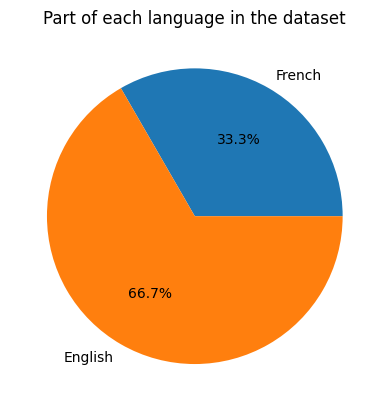

In [15]:
french = dfi[dfi['language'] == 'french']
english = dfi[dfi['language'] == 'english']

fig, ax = plt.subplots()
ax.pie([len(french), len(english)], labels=['French', 'English'], autopct='%1.1f%%')
ax.set_title('Part of each language in the dataset')

The dataset is made of 1/3 of letters in French, and 2/3 of letters in English.

This code calculates the number of letters by year in a dataset and visualizes the result using a bar chart created with the Matplotlib library. The number of letters for each year is stored in a dictionary called 'years' and then plotted with the year on the x-axis and the count of letters on the y-axis.










Text(0.5, 1.0, 'Number of letters by year in the dataset')

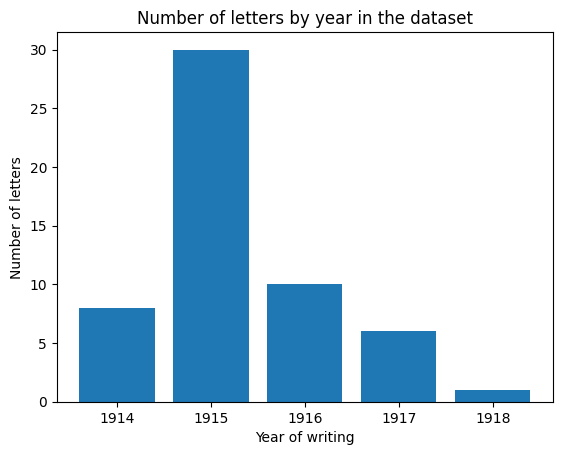

In [16]:
years = {}
for y in set(dfi['year']):
    if y > 0:
        years[y] = len(dfi[dfi['year']== y])

fig, ax = plt.subplots()
ax.bar(years.keys(), years.values())
ax.set_xlabel('Year of writing')
ax.set_ylabel('Number of letters')
ax.set_title('Number of letters by year in the dataset')

There are much more letters written in 1915 than in the other years.

##  Text analysis

We will start by a seperate study of letters depending on their language.

install stop_words package

In [17]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


This code loads the contents of a JSON file containing letters, cleans the text by removing stop words, and combines the letters into a single string for French and English languages. It uses the get_stop_words() function from the stop_words package and the clean_str() function to clean the text.






In [18]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from stop_words import get_stop_words

with open('letters.json', 'r') as f:
    letters_data=f.read()
    
letters = json.loads(letters_data)

def clean_str(st, lang='english'):
    aux = st.replace('\n',' ').lower()
    res = ''
    for word in aux.split(' '):
        if word not in get_stop_words(lang):
            res += word + ' '
    return res
    
f_letters = {}
e_letters = {}

for idx, row in dfi.iterrows():
    if row['language'] == 'french':
        f_letters[row['letter_key']] = letters[row['letter_key']]
    elif row['language'] == 'english':
        e_letters[row['letter_key']] = letters[row['letter_key']]

def combine_letters(l_dict, lang='english'):
    res = ''
    for letter in l_dict.values():
        res += clean_str(letter, lang)
    return res

f_str = combine_letters(f_letters, lang='french')
e_str = combine_letters(e_letters)

Let's start by drawing some word clouds. It is not very accurate, but still very visual.

It generates a word cloud from the French letters data using the WordCloud library and shows the result using imshow method.






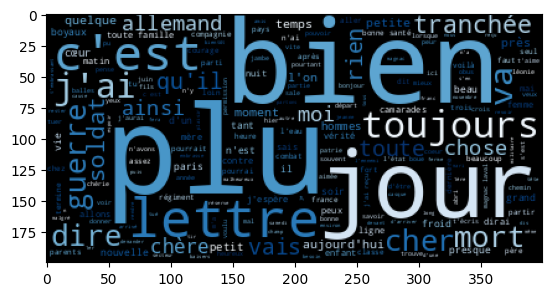

In [19]:
fig, ax = plt.subplots()
wc_f = WordCloud(colormap='Blues').generate_from_text(f_str)
ax.imshow(wc_f)

It is interesting to see that the biggest words look quite positive: "bien" (good), "jour" (day). But tougher words appear right behind: "guerre" (war), "tranchée" (trench), "mort" (death), etc...
We can also note that the stop_words is not perfect, as some words like "c'est" (it's), "qu'il" (that he), "toute" (every), still remain.

This code generates a word cloud using the English letters in the dataset, with the color map set to 'Reds'.






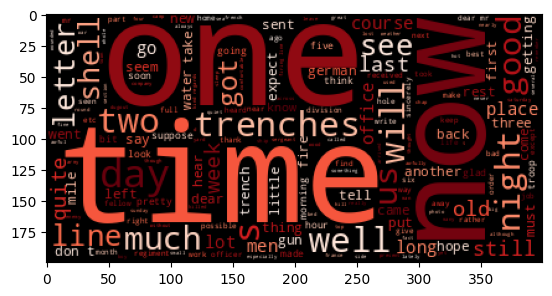

In [20]:
fig, ax = plt.subplots()
wc_e = WordCloud(colormap='Reds').generate_from_text(e_str)
ax.imshow(wc_e)

English letters seem to be particularily focused on time (time, day, night, week). There are some words in common with the French cloud (well, day, trenches, letter).